# 1 Importing Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

print(os.getcwd())

C:\Users\mbdav\OneDrive\Documents\Sepsis\Notebooks


# 2 Importing Data

In [3]:
os.chdir(r'C:\\Users\\mbdav\\OneDrive\\Documents\\Sepsis\\datasets')
sepsis_train = pd.read_csv('train.csv')
sepsis_test = pd.read_csv('test.csv')
os.chdir(r'C:\\Users\\mbdav\\OneDrive\\Documents\\Sepsis\\Notebooks')

C:\Users\mbdav\AppData\Local\Temp\ipykernel_2224\1135945752.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  sepsis_test = pd.read_csv('test.csv')


# 3 Checking the Data

In [4]:
print(sepsis_train.head())
print(sepsis_train.tail())
print('Rows', sepsis_train.shape[0])
print('Columns', sepsis_train.shape[1])

print(sepsis_train.isna().sum())
print(sepsis_train.dtypes)

   patient  time    HR  O2Sat   Temp    SBP   MAP   DBP  Resp  EtCO2  ...  \
0    16426     1   NaN    NaN    NaN    NaN   NaN   NaN   NaN    NaN  ...   
1    16426     2  78.0   99.5  35.25  108.5  84.5  69.0  12.0    NaN  ...   
2    16426     3  80.0   99.0  36.20  113.0  87.0  73.0  12.0    NaN  ...   
3    16426     4  79.0  100.0  36.50  112.0  83.0  68.0  12.0    NaN  ...   
4    16426     5  73.0  100.0  36.50  115.0  80.0  64.0  11.0    NaN  ...   

    WBC  Fibrinogen  Platelets    Age  Gender  Unit1  Unit2  HospAdmTime  \
0   NaN         NaN        NaN  57.03     1.0    0.0    1.0        -4.25   
1  14.2         NaN        NaN  57.03     1.0    0.0    1.0        -4.25   
2   NaN         NaN        NaN  57.03     1.0    0.0    1.0        -4.25   
3   NaN         NaN        NaN  57.03     1.0    0.0    1.0        -4.25   
4   NaN         NaN        NaN  57.03     1.0    0.0    1.0        -4.25   

   ICULOS  SepsisLabel  
0     1.0          0.0  
1     2.0          0.0  
2    

In [5]:
print(sepsis_train.isna().sum())
missing_percentage = sepsis_train.isna().sum() / len(sepsis_train) * 100
print(missing_percentage)

patient                   0
time                      0
HR                   107230
O2Sat                141064
Temp                 718985
SBP                  157101
MAP                  135168
DBP                  338840
Resp                 167075
EtCO2               1046686
BaseExcess          1029375
HCO3                1042885
FiO2                 997444
pH                  1012707
PaCO2               1027588
SaO2                1050677
AST                 1070398
BUN                 1013462
Alkalinephos        1070563
Calcium             1023805
Chloride            1039077
Creatinine          1021743
Bilirubin_direct    1086046
Glucose              901208
Lactate             1058882
Magnesium           1019649
Phosphate           1044482
Potassium            986595
Bilirubin_total     1071796
TroponinI           1077788
Hct                  991573
Hgb                 1007652
PTT                 1056073
WBC                 1018245
Fibrinogen          1080708
Platelets           

At first glance the vital signs looks ok. Enough variables there to do some imputations for the data and drop temperature and ETCO2. Lab values are horrendous all have over 90% N/A rate. Demographics look ok besides Unit for ICU unit. Forward fill might be our best option. However, we can drop those with over 99% at least.

In [7]:
patient_index =1516

pd.set_option('display.max_columns', None)

sepsis_train[sepsis_train['patient'] == patient_index]



,patient,time,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
39622,1516,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,1.0,0.0,1.0,-10.05,1.0,0.0
39623,1516,2,77.0,100.0,NaN,196.0,94.0,49.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,1.0,0.0,1.0,-10.05,2.0,0.0
39624,1516,3,78.0,100.0,NaN,200.0,92.0,46.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,1.0,0.0,1.0,-10.05,3.0,0.0
39625,1516,4,73.0,99.5,NaN,177.0,82.0,41.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,1.0,0.0,1.0,-10.05,4.0,0.0
39626,1516,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,1.0,0.0,1.0,-10.05,5.0,0.0
39627,1516,6,70.0,100.0,NaN,152.0,88.0,62.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,1.0,0.0,1.0,-10.05,6.0,0.0
39628,1516,7,70.0,100.0,NaN,156.0,80.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,NaN,7.8,NaN,4.33,NaN,102.0,NaN,NaN,6.4,3.7,NaN,NaN,34.1,10.5,NaN,8.2,NaN,160.0,83.0,1.0,0.0,1.0,-10.05,7.0,0.0
39629,1516,8,70.0,99.0,36.3,112.0,82.0,72.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,1.0,0.0,1.0,-10.05,8.0,0.0
39630,1516,9,44.0,100.0,NaN,99.0,67.0,42.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,1.0,0.0,1.0,-10.05,9.0,0.0
39631,1516,10,56.0,100.0,NaN,123.0,69.0,42.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,1.0,0.0,1.0,-10.05,10.0,0.0


In [6]:
patient_count = 0

for e in range(len(sepsis_train['patient'])):
    if e ==0 or sepsis_train['patient'][e] != sepsis_train['patient'][e-1]:
               patient_count += 1
            
print(patient_count)

28235


In [ ]:
index_sepsis = []

for s in range(len(sepsis_train['SepsisLabel'])):
    if sepsis_train['SepsisLabel'][s] == 1:
        index_sepsis.append(s)
        
print(index_sepsis)

In [22]:
print(len(index_sepsis))

is_sepsis_df = sepsis_train.loc[index_sepsis]

is_sepsis_df

print(is_sepsis_df.isna().sum())
missing_percentage_is = is_sepsis_df.isna().sum() / len(is_sepsis_df) * 100
print(missing_percentage_is)



19621
patient                 0
time                    0
HR                   1587
O2Sat                2026
Temp                12938
SBP                  3079
MAP                  1923
DBP                  5894
Resp                 2849
EtCO2               17463
BaseExcess          17627
HCO3                18412
FiO2                16094
pH                  17003
PaCO2               17401
SaO2                18350
AST                 19001
BUN                 17838
Alkalinephos        19003
Calcium             17933
Chloride            18276
Creatinine          18098
Bilirubin_direct    19525
Glucose             16010
Lactate             18212
Magnesium           17949
Phosphate           18468
Potassium           17019
Bilirubin_total     19057
TroponinI           19391
Hct                 17411
Hgb                 17736
PTT                 18774
WBC                 17981
Fibrinogen          19408
Platelets           18138
Age                     0
Gender                  0
Unit1 

In [30]:
time_of_initial_s = []

# Loop through the rows of the DataFrame using .iloc[] for positional indexing
for n in range(len(is_sepsis_df)):
    if n == 0 or is_sepsis_df['time'].iloc[n] != is_sepsis_df['time'].iloc[n-1] +1:
        time_of_initial_s.append(is_sepsis_df['time'].iloc[n])

print(time_of_initial_s)
t_o_i_s = np.array(time_of_initial_s)
print(np.mean(t_o_i_s))
print(np.median(t_o_i_s))

[33, 1, 49, 1, 220, 37, 20, 34, 10, 106, 95, 41, 16, 215, 46, 114, 2, 35, 144, 85, 91, 80, 1, 32, 12, 42, 99, 42, 11, 1, 37, 7, 35, 29, 46, 110, 49, 31, 2, 106, 54, 5, 1, 31, 47, 37, 97, 9, 5, 74, 21, 1, 70, 66, 11, 1, 1, 309, 13, 13, 30, 10, 67, 59, 67, 78, 1, 56, 100, 26, 1, 45, 9, 87, 10, 65, 40, 38, 152, 19, 7, 8, 22, 35, 1, 1, 1, 29, 1, 24, 87, 5, 21, 1, 1, 17, 90, 1, 168, 1, 204, 3, 14, 9, 1, 1, 266, 4, 75, 4, 53, 108, 1, 96, 66, 17, 1, 26, 71, 48, 46, 12, 20, 144, 5, 1, 65, 31, 66, 36, 58, 73, 1, 11, 88, 5, 8, 6, 1, 43, 1, 3, 11, 3, 6, 21, 3, 331, 197, 42, 4, 81, 14, 33, 12, 6, 77, 114, 32, 1, 44, 26, 19, 215, 45, 78, 16, 9, 1, 90, 106, 1, 1, 63, 26, 3, 18, 1, 1, 76, 1, 160, 73, 80, 1, 126, 13, 8, 1, 4, 92, 39, 5, 124, 55, 42, 9, 74, 32, 16, 1, 67, 31, 85, 10, 3, 49, 4, 13, 11, 12, 142, 1, 1, 69, 22, 46, 12, 33, 1, 1, 9, 33, 1, 13, 7, 42, 136, 125, 2, 57, 30, 1, 162, 5, 28, 3, 41, 234, 303, 197, 15, 14, 1, 34, 5, 67, 2, 2, 35, 2, 27, 18, 9, 1, 52, 9, 1, 247, 18, 175, 3, 85, 116,

# 4 Plots

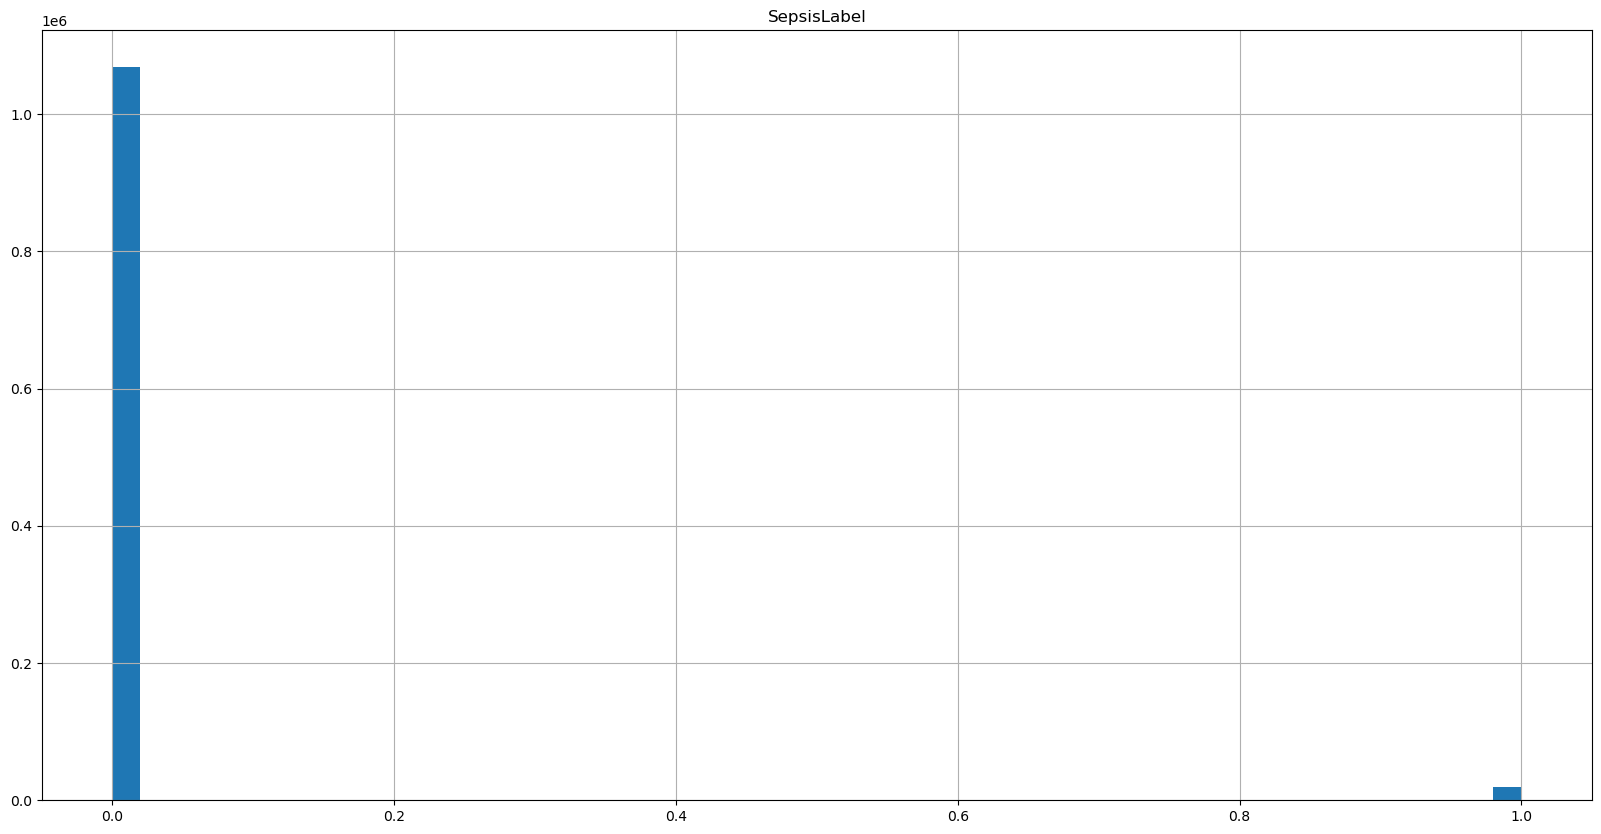

In [33]:
y = pd.DataFrame(sepsis_train[['SepsisLabel']])

### Histogram plots of outcome
y.hist(bins=50, figsize=(20, 10))
plt.show()



array([[<AxesSubplot:title={'center':'patient'}>,
        <AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'O2Sat'}>,
        <AxesSubplot:title={'center':'Temp'}>,
        <AxesSubplot:title={'center':'SBP'}>],
       [<AxesSubplot:title={'center':'MAP'}>,
        <AxesSubplot:title={'center':'DBP'}>,
        <AxesSubplot:title={'center':'Resp'}>,
        <AxesSubplot:title={'center':'EtCO2'}>,
        <AxesSubplot:title={'center':'BaseExcess'}>,
        <AxesSubplot:title={'center':'HCO3'}>],
       [<AxesSubplot:title={'center':'FiO2'}>,
        <AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'PaCO2'}>,
        <AxesSubplot:title={'center':'SaO2'}>,
        <AxesSubplot:title={'center':'AST'}>,
        <AxesSubplot:title={'center':'BUN'}>],
       [<AxesSubplot:title={'center':'Alkalinephos'}>,
        <AxesSubplot:title={'center':'Calcium'}>,
        <AxesSubplot:title={'center':'Chlor

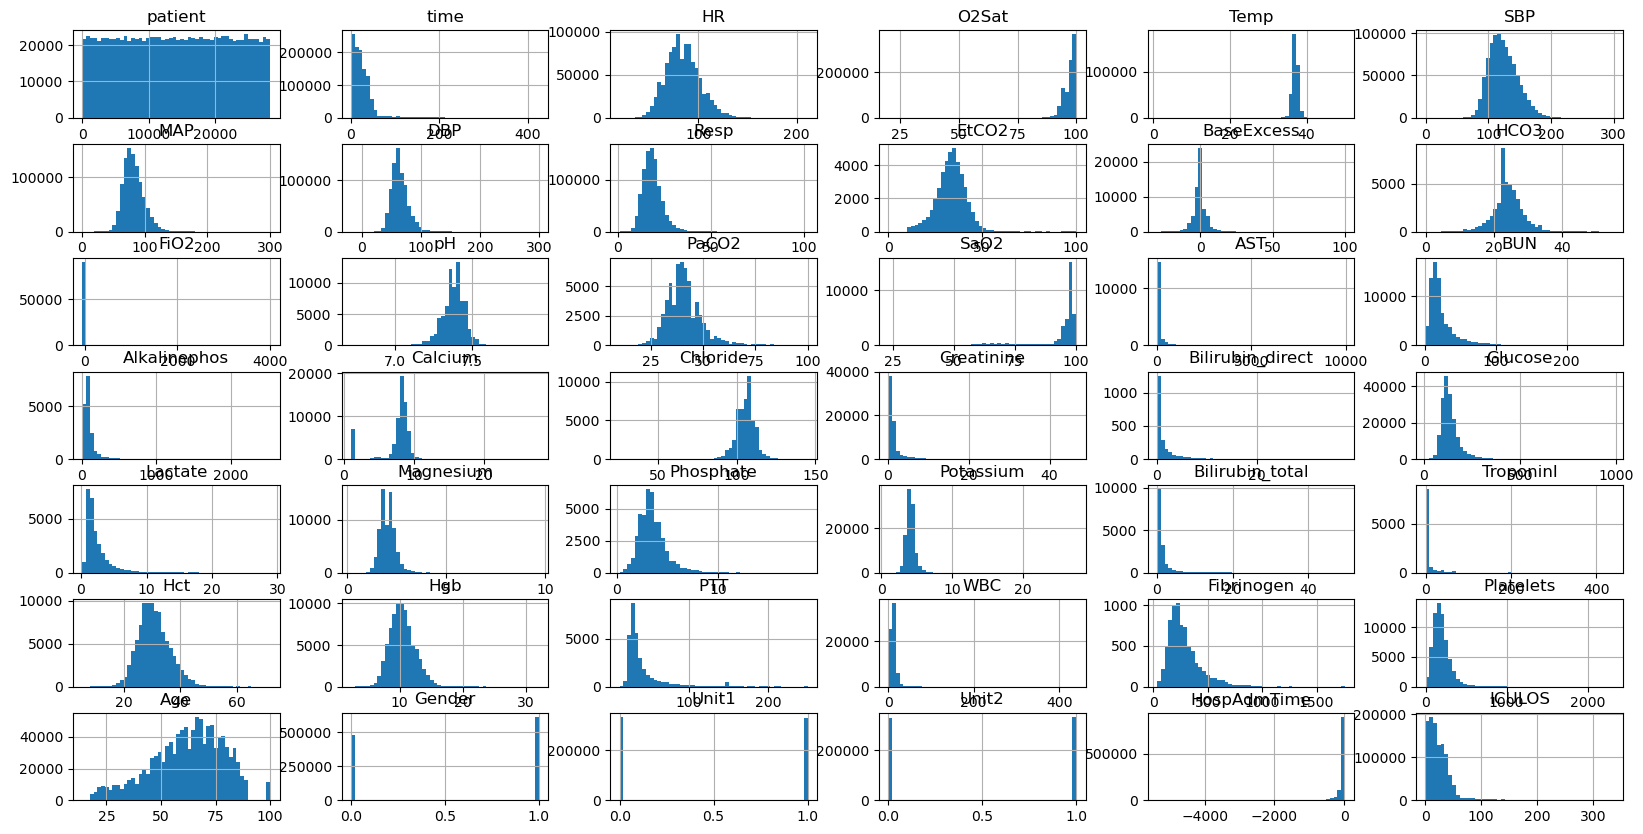

In [7]:
X = sepsis_train.drop(columns=['SepsisLabel'])
X.hist(bins = 50, figsize = (20,10))

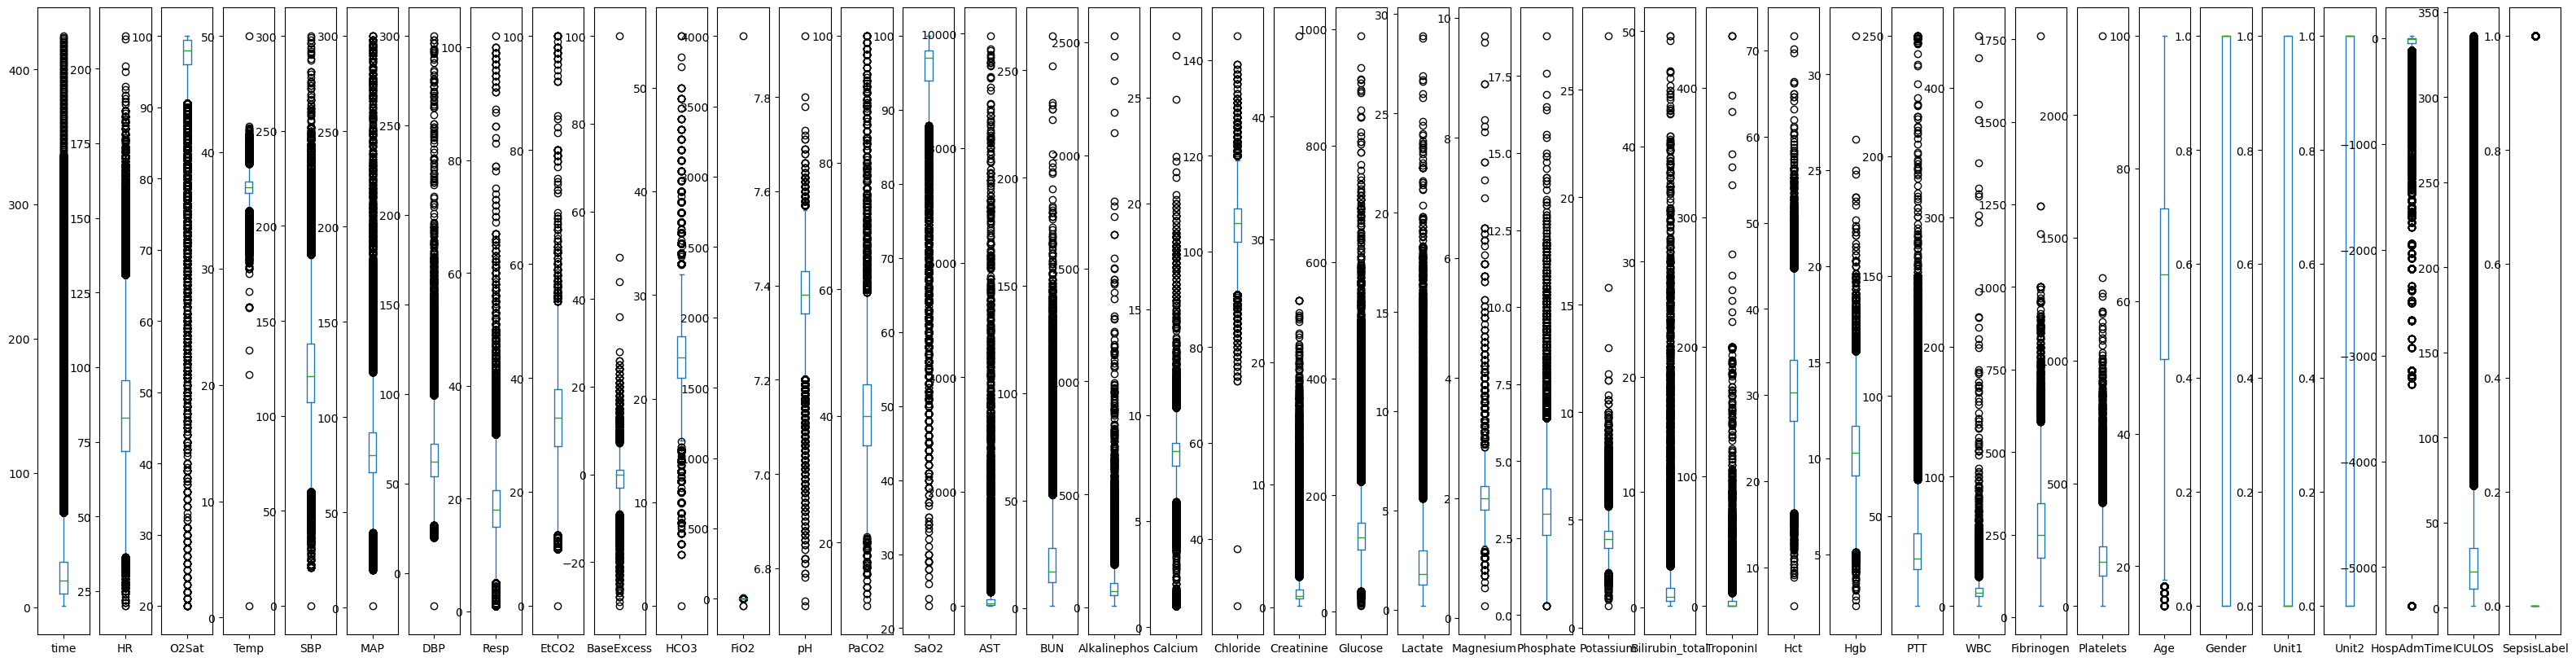

In [15]:
X.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(40, 10)
)

plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.pairplot(X)

In [1]:
plt.figure(figsize=(16, 6))
sns.heatmap(X.corr(),annot=True,square=True)

NameError: name 'plt' is not defined